# LeetCode: [Valid Sudoku](https://leetcode.com/problems/valid-sudoku)

__Difficulty: Medium__

__Data Structure(s): Array__

__Techniques: multiple dictionary of hashsets, individual number indexes and box indexes__

<hr>

### Description:

Determine if a `9 x 9 `Sudoku board is valid. Only the filled cells need to be validated according to the following rules:

1. Each row must contain the digits `1-9` without repetition.
2. Each column must contain the digits `1-9` without repetition.
3. Each of the nine `3 x 3` sub-boxes of the grid must contain the digits `1-9` without repetition.

__Note:__

* A Sudoku board (partially filled) could be valid but is not necessarily solvable.
* Only the filled cells need to be validated according to the mentioned rules.


 

__Example 1:__

Input: 

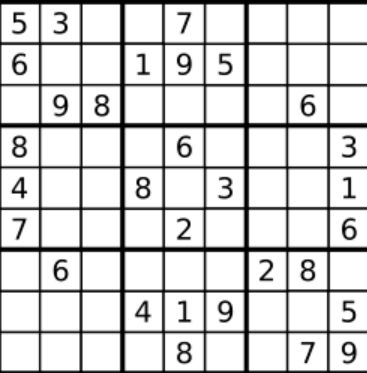
```
board = 
[["5","3",".",".","7",".",".",".","."]
,["6",".",".","1","9","5",".",".","."]
,[".","9","8",".",".",".",".","6","."]
,["8",".",".",".","6",".",".",".","3"]
,["4",".",".","8",".","3",".",".","1"]
,["7",".",".",".","2",".",".",".","6"]
,[".","6",".",".",".",".","2","8","."]
,[".",".",".","4","1","9",".",".","5"]
,[".",".",".",".","8",".",".","7","9"]]
```
Output: true

__Example 2:__

Input: 
```
board = 
[["8","3",".",".","7",".",".",".","."]
,["6",".",".","1","9","5",".",".","."]
,[".","9","8",".",".",".",".","6","."]
,["8",".",".",".","6",".",".",".","3"]
,["4",".",".","8",".","3",".",".","1"]
,["7",".",".",".","2",".",".",".","6"]
,[".","6",".",".",".",".","2","8","."]
,[".",".",".","4","1","9",".",".","5"]
,[".",".",".",".","8",".",".","7","9"]]
```
Output: false
Explanation: Same as Example 1, except with the 5 in the top left corner being modified to __8__. Since there are two 8's in the top left 3x3 sub-box, it is invalid.


 

Constraints:

* `board.length == 9`
* `board[i].length == 9`
* `board[i][j]` is a digit 1-9 or '.'.


<hr>

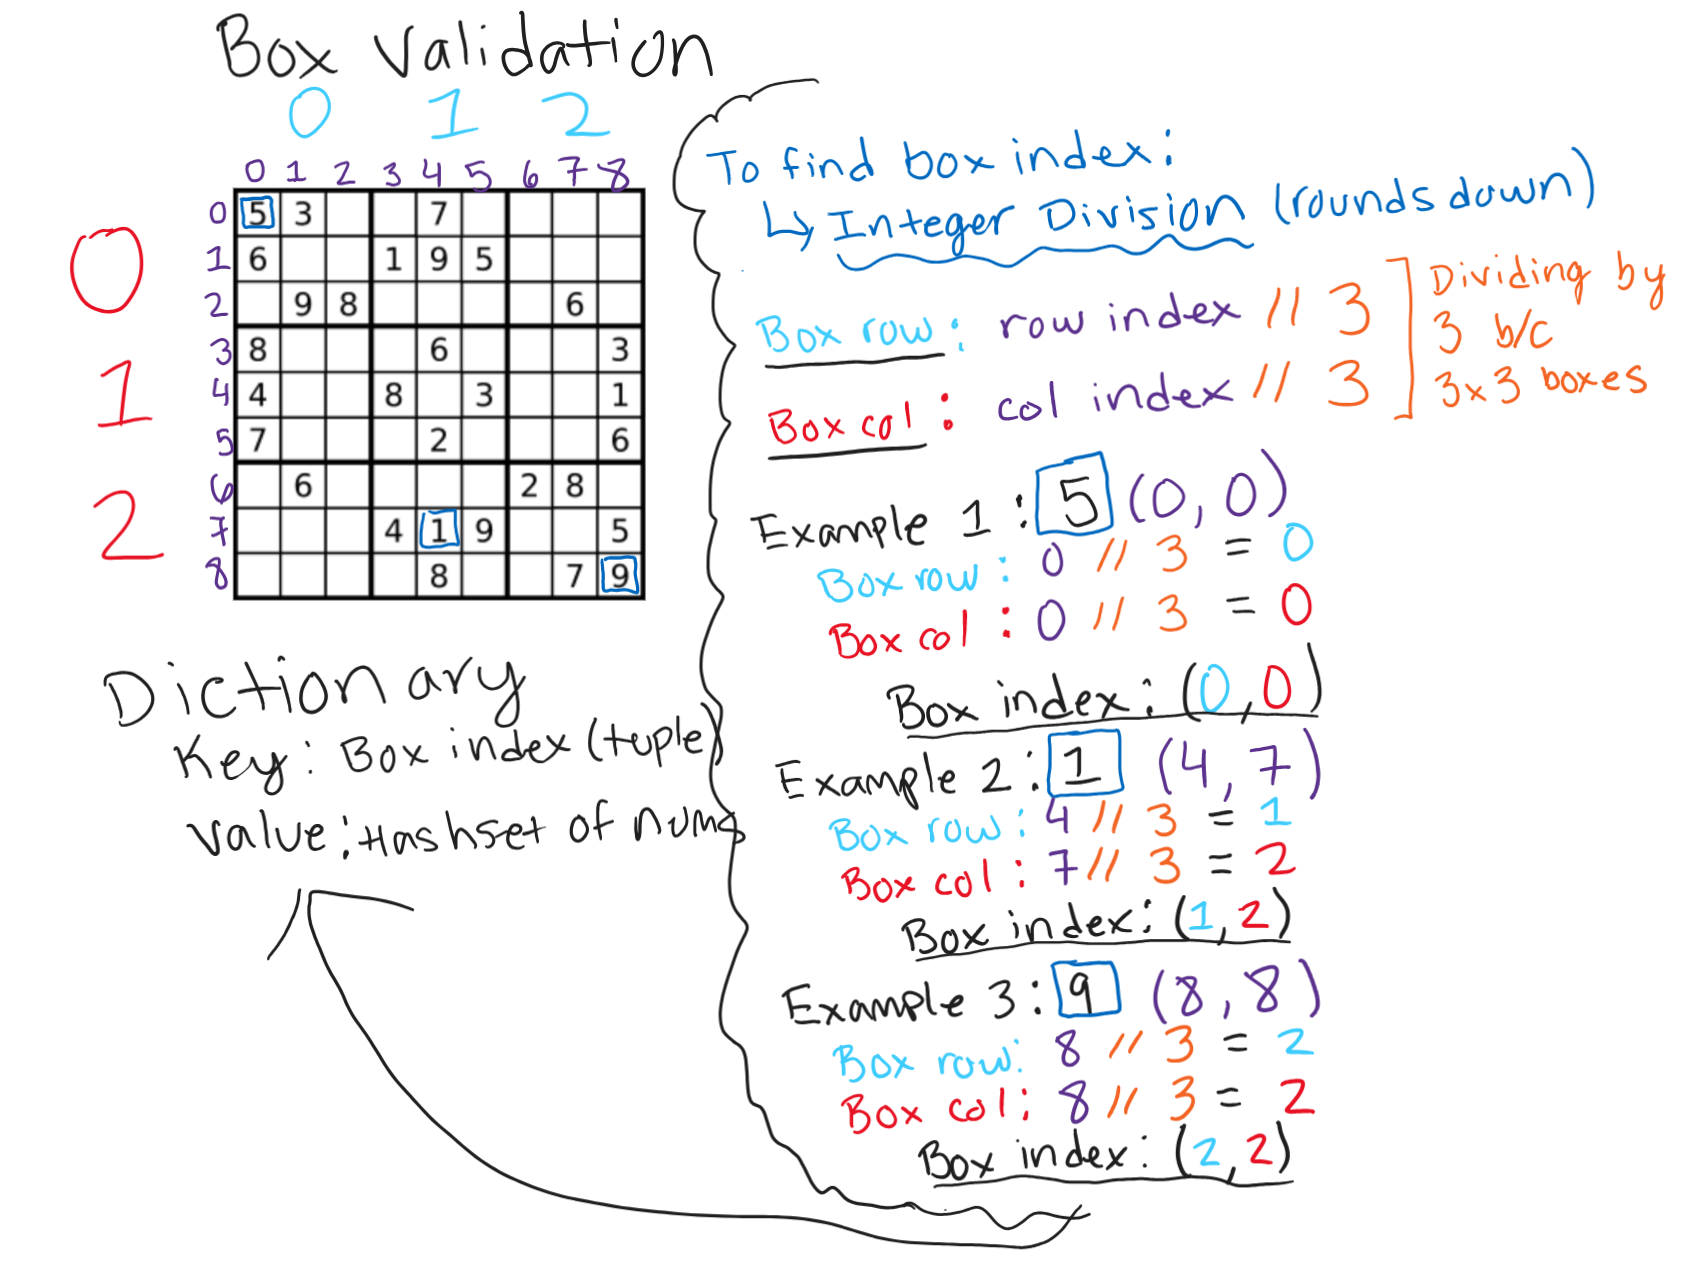

In [17]:
board = [
    ["5","3",".",".","7",".",".",".","."],
    ["6",".",".","1","9","5",".",".","."],
    [".","9","8",".",".",".",".","6","."],
    ["8",".",".",".","6",".",".",".","3"],
    ["4",".",".","8",".","3",".",".","1"],
    ["7",".",".",".","2",".",".",".","6"],
    [".","6",".",".",".",".","2","8","."],
    [".",".",".","4","1","9",".",".","5"],
    [".",".",".",".","8",".",".","7","9"]
]

def validSudoku(board):
    # Validate: By row, by column, by box

    colToNumsDict = dict() # for column validation
    boxIndexToNumsDict = dict() # for box validation

    # ~ ROW VALIDATION ~
    for row in range(9):
        # new set for each row
        rowSet = set() # for row validation
        
        for col in range(9):
            if (board[row][col] == "."):
                continue
            if (board[row][col] in rowSet):
                return False
            
            rowSet.add(board[row][col])
            
            # ~ COLUMN VALIDATION ~
            # add to col dictionary (key: col index, value: hashset of nums)
            if (col not in colToNumsDict):
                colToNumsDict[col] = set()
                colToNumsDict[col].add(board[row][col])
            else:
                if (board[row][col] in colToNumsDict[col]):
                    return False
                colToNumsDict[col].add(board[row][col])

            # ~ BOX VALIDATION ~
            boxIndexRow = row // 3
            boxIndexCol = col // 3
            boxIndex = tuple([boxIndexRow, boxIndexCol])

            # add box index to dictionary (key: box index tuple, value: hashset of nums)
            if (boxIndex not in boxIndexToNumsDict):
                boxIndexToNumsDict[boxIndex] = set()
                boxIndexToNumsDict[boxIndex].add(board[row][col])
            else:
                if (board[row][col] in boxIndexToNumsDict[boxIndex]):
                    return False
                boxIndexToNumsDict[boxIndex].add(board[row][col])

    print(colToNumsDict)
    print(boxIndexToNumsDict)
    return True
    

validSudoku(board)

{0: {'4', '8', '5', '7', '6'}, 1: {'9', '3', '6'}, 4: {'8', '2', '7', '9', '6', '1'}, 3: {'1', '4', '8'}, 5: {'9', '5', '3'}, 2: {'8'}, 7: {'7', '8', '6'}, 8: {'5', '3', '9', '6', '1'}, 6: {'2'}}
{(0, 0): {'8', '5', '3', '9', '6'}, (0, 1): {'1', '9', '5', '7'}, (0, 2): {'6'}, (1, 0): {'4', '7', '8'}, (1, 1): {'2', '3', '8', '6'}, (1, 2): {'1', '3', '6'}, (2, 0): {'6'}, (2, 2): {'8', '5', '2', '7', '9'}, (2, 1): {'1', '4', '9', '8'}}


True